In [14]:
import pandas as pd
import pydeck as pdk
import plotly.graph_objects as go
from shapely.wkt import loads
import numpy as np
import math

In [2]:
df = pd.read_csv('/Users/carboni/Downloads/merged.csv', low_memory=False)

In [3]:
df.head()

,Media URL,City,Country,wkt,normalized_date,Title,Journal Type,source
0,https://iiif.unige.ch/dhportal/ug27808014/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1973-01-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv
1,https://iiif.unige.ch/dhportal/ug27812178/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1974-01-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv
2,https://iiif.unige.ch/dhportal/ug27809875/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1975-01-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv
3,https://iiif.unige.ch/dhportal/ug27815928/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1973-02-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv
4,https://iiif.unige.ch/dhportal/ug27810859/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1974-02-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv


In [5]:
df['Title_Count'] = df.groupby('Country')['Title'].transform('count')

In [6]:
df_unique = df.drop_duplicates(subset=['Title'])

In [7]:
df_unique.head()

,Media URL,City,Country,wkt,normalized_date,Title,Journal Type,source,Title_Count
0,https://iiif.unige.ch/dhportal/ug27808014/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1973-01-01,Kontekst,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv,737.0
32,https://iiif.unige.ch/dhportal/ug27803682/mani...,Paris,France,POINT(2.352222222222222 48.85666666666667),1950-01-01,Art d’Aujourd’hui,Avant-garde Journal,Adrien iaddb data iiif(UNIGE).csv,403886.0
68,https://iiif.unige.ch/dhportal/ug27817654/mani...,London,United Kingdom,POINT(-0.1275 51.507222222222),1923-01-01,Commercial Art - Art and Industry,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv,886.0
249,https://iiif.unige.ch/dhportal/ug27803680/mani...,Amsterdam,Netherlands,POINT(4.9 52.383333333333),1967-01-01,Art Directors Annual,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv,737.0
288,https://iiif.unige.ch/dhportal/ug27811437/mani...,Geneva,Switzerland,POINT(6.15 46.2),1947-01-01,Publicité et Arts graphiques,Illustrated Magazine,Adrien iaddb data iiif(UNIGE).csv,1823.0


In [19]:
df_unique['Titles_Log'] = df_unique['Title_Count'].apply(lambda x: 0 if x == 0 else math.log10(x))

/var/folders/nw/zm4zl9xn4_d_rq3fnglst3n80000gp/T/ipykernel_2575/3478674660.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



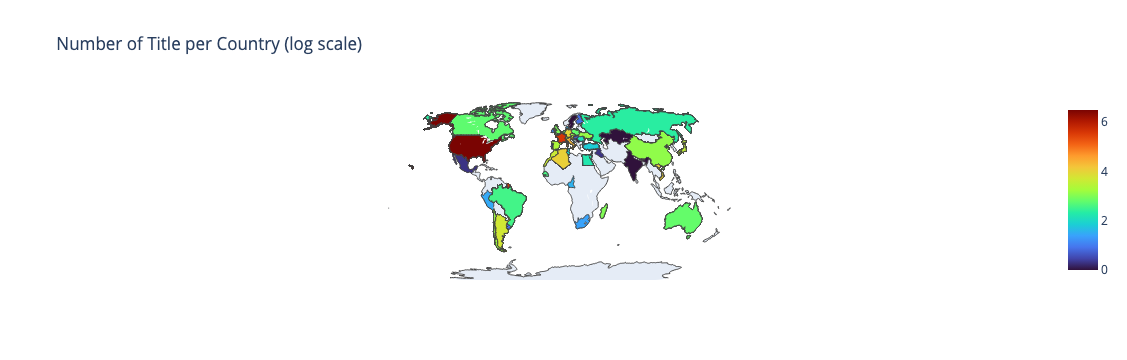

In [25]:
# Get a map of the world
fig = go.Figure(data=go.Choropleth(
    locations = df_unique['Country'],
    locationmode = 'country names',
    z = df_unique['Titles_Log'],
    text = df_unique['Country'],
    colorscale = 'turbo'
#    colorbar_title = 'Number of Images per Country'
))

fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title_text='Number of Title per Country (log scale)',
    geo=dict(
        showframe=False,
        showcoastlines=True,
    )
)

In [26]:
fig.write_image("world_map_log.png", scale=9)

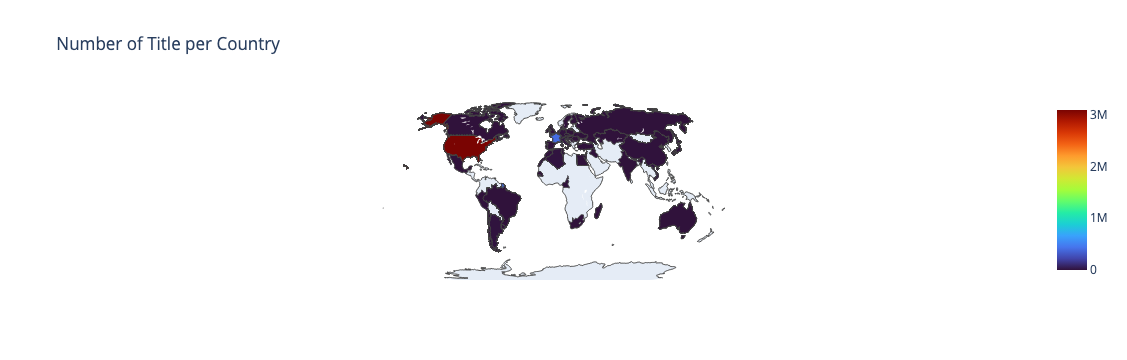

In [27]:
# Get a map of the world
fig = go.Figure(data=go.Choropleth(
    locations = df_unique['Country'],
    locationmode = 'country names',
    z = df_unique['Title_Count'],
    text = df_unique['Country'],
    colorscale = 'turbo'
#    colorbar_title = 'Number of Images per Country'
))

fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title_text='Number of Title per Country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
    )
)

In [28]:
fig.write_image("world_map_no_log.png", scale=9)

### Eliminate NaN from the column WKT and the column City

In [ ]:
df = df.dropna(subset=['City'])

In [ ]:
df['wkt'] = df['wkt'].astype(str)

In [ ]:
df = df[~df['wkt'].str.contains('nan')]

In [ ]:
df['city_number'] = df.groupby(['City', 'Country'])['City'].transform('count')

In [ ]:
# Group by Country and sum the n_images
df_grouped = df.groupby('Country')['city_number'].sum().reset_index()

In [ ]:
df_grouped['normalized_counts'] = np.log(df_grouped['city_number'])

In [ ]:
# Get a map of the world
fig = go.Figure(data=go.Choropleth(
    locations = df_grouped['Country'],
    locationmode = 'country names',
    z = df_grouped['normalized_counts'],
    text = df_grouped['Country'],
    colorscale = 'turbo'
#    colorbar_title = 'Number of Images per Country'
))

fig.update_geos(projection_type="natural earth")

fig.update_layout(
    title_text='Number of Images per Country',
    geo=dict(
        showframe=False,
        showcoastlines=True,
    )
)

In [ ]:
fig.write_image("world_map.png", scale=9)